In [29]:
from einops import concat, redim, transpose, rearrange, repeat, reduce

In [30]:
import time
import torch
import numpy as np
from PIL import Image

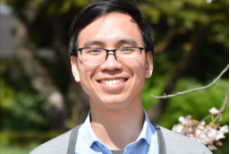

In [31]:
img = Image.open("ava.png")
img

In [32]:
img = np.array(img)
tensor = rearrange(img, "h w c ->() h w c")
tensor.shape

(1, 154, 231, 4)

In [33]:
start = time.time()
iterations = 1

for i in range(iterations):
    out1 = np.concatenate([tensor, tensor], axis=0)
end = time.time()
print(f"Slice time {end-start:.5f}s")

start = time.time()
for i in range(iterations):
    # out2 = redim(tensor, "b h [(w1 w2 w3) -> w2] c", w1=50, w3=50)
    out2 = concat([tensor, tensor], "[...->b] h w c")
end = time.time()
print(f"Redim time {end-start:.5f}s")

Slice time 0.00069s
identifer_left []
identifer_right ['h', 'w', 'c']
identifer_left []
identifer_right ['h', 'w', 'c']
Redim time 0.00039s


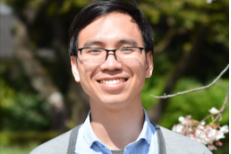

In [34]:
Image.fromarray(out2[0])

## Re-Dimension

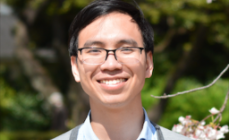

In [35]:
torch_tensor = torch.from_numpy(tensor)
Image.fromarray(redim(torch_tensor, "b [(h1 h2 h3) -> (h1 h3)] w c", h1=140, h2=50).numpy()[0])

In [36]:
x = redim(torch_tensor, "b [(h1 h2 h3) -> (h1 h3)] w c", b=1, w=231, c=4, h1=100, h2=24)
x.shape

torch.Size([1, 130, 231, 4])

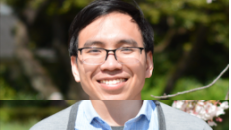

In [37]:
Image.fromarray(x.numpy()[0])

## Concatenation

In [38]:
out2 = concat([tensor, tensor, tensor, tensor], "[b1 b2 b3 b4 -> (b1 b2 b3 b4)] h w c")

identifer_left []
identifer_right ['h', 'w', 'c']
identifer_left []
identifer_right ['h', 'w', 'c']
identifer_left []
identifer_right ['h', 'w', 'c']
identifer_left []
identifer_right ['h', 'w', 'c']


In [39]:
x = torch.randn(2, 10, 512)
y = torch.randn(2, 10, 128)
z = torch.randn(2, 10, 256)
h = concat([x, y, z], "batch seq [dx dy dz -> (dx dy dz)]", batch=2, seq=10, dx=512, dy=128, dz=256)

identifer_left ['batch', 'seq']
identifer_right []
identifer_left ['batch', 'seq']
identifer_right []
identifer_left ['batch', 'seq']
identifer_right []


In [40]:
h.shape

torch.Size([2, 10, 896])